In [1]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}


In [9]:
def find_corr(df, weather_values):
    corr={}
    p_val ={}
    from scipy.stats import pearsonr

    for appliance in APPLIANCES_ORDER:

        mean_df = df[['%s_%d' %(appliance, month) for month in range(1, 13)]].mean()
        mean_df.index = range(12)
        corr[appliance] = mean_df.corr(pd.DataFrame(weather_values).squeeze())
        p_val[appliance] = pearsonr(mean_df, pd.DataFrame(weather_values).squeeze())[1]
    return corr, p_val

In [12]:
year = 2014
p ={}
corr={}
for region in ['Austin', 'SanDiego']:
    df, dfc = create_matrix_single_region(region, year)
    start, stop = 1, 13
    energy_cols = np.array([['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[year][region][start - 1:stop - 1]).reshape(-1, 1)
    corr[region], p[region] = find_corr(df, weather_values)
    


In [51]:
stats.linregress(weather_values.flatten(), mean_df)

LinregressResult(slope=1079.7727677534347, intercept=457.95417777439582, rvalue=0.82687723839390859, pvalue=0.00090869054079383146, stderr=232.23255541912695)

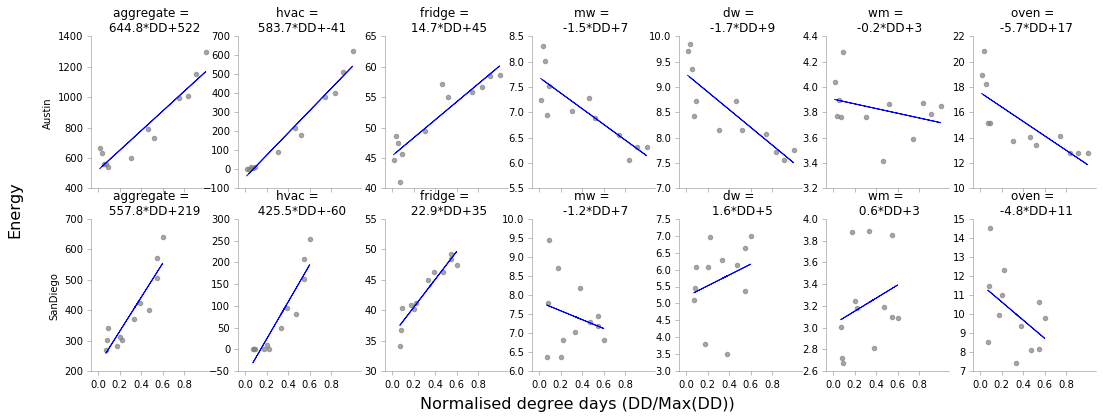

In [90]:
lf = {}
from plot_functions import *
from scipy import stats
fig, ax = plt.subplots(nrows=2, ncols=7, sharex=True, figsize=(18, 6))
for i, region in enumerate(['Austin', 'SanDiego']):
    lf[region] = {}
    df, dfc = create_matrix_single_region(region, year)
    weather_values = np.array(dds[year][region][start - 1:stop - 1]).reshape(-1, 1)

    start, stop = 1, 13
    for j, appliance in enumerate(APPLIANCES_ORDER):
        

        mean_df = df[['%s_%d' %(appliance, month) for month in range(1, 13)]].mean()
        mean_df.index = range(12)
        slope, intercept, r_value, p_value, std_err = stats.linregress(weather_values.flatten(), mean_df)
        ax[i, j].scatter(weather_values, mean_df.values, color='grey',alpha=0.7)
        ax[i, j].plot(weather_values, weather_values*slope+intercept)
        ax[i, j].xaxis.set_ticks(np.arange(0, 1.0,0.2))
        format_axes(ax[i,j])
        ax[i, j].set_title("%s = \n %0.1f*DD+%d" %(appliance, slope, intercept))
        
        ax[0, 0].set_ylabel('Austin')
        ax[1, 0].set_ylabel('SanDiego')
fig.text(0.5, 0.04, 'Normalised degree days (DD/Max(DD))', ha='center', fontsize=16)       
fig.text(0.06, 0.5, 'Energy', va='center', fontsize=16, rotation='vertical')       

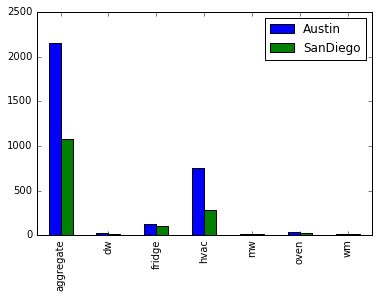

In [38]:
pd.DataFrame(lf).plot(kind='bar')

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt


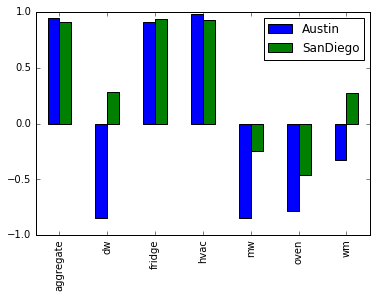

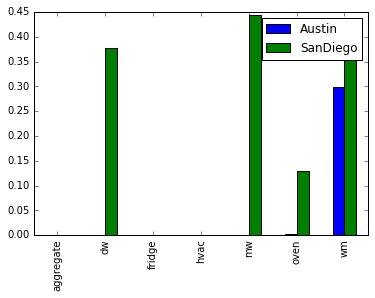

In [18]:
pd.DataFrame(corr).plot(kind='bar')
pd.DataFrame(p).plot(kind='bar')

### Appliance weather correlation

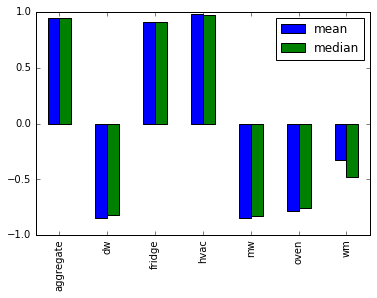

In [7]:
pd.DataFrame(corr).plot(kind='bar')

In [11]:
from plot_functions import *

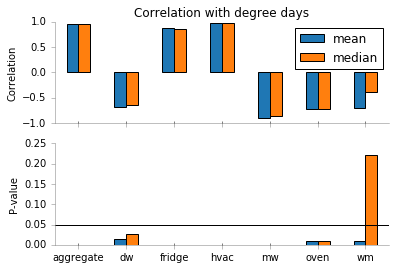

In [45]:
fig, ax = plt.subplots(nrows=2, sharex=True)
pd.DataFrame(corr).plot(kind='bar', rot=0, color=tableau20blind[::2], ax=ax[0])
ax[0].set_title("Correlation with degree days")
ax[0].set_ylabel("Correlation")
format_axes(ax[0])
pd.DataFrame(p_val).plot(kind='bar',rot=0, color=tableau20blind[::2], ax=ax[1], legend=False)
plt.ylabel("P-value")
plt.axhline(0.05, color='k')
format_axes(plt.gca())

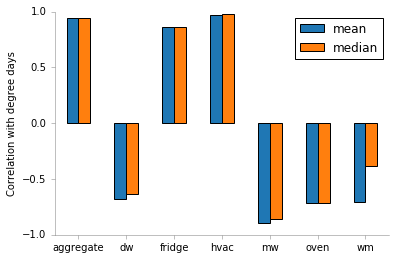

In [14]:
pd.DataFrame(corr).plot(kind='bar',rot=0, color=tableau20blind[::2])
plt.ylabel("Correlation with degree days")
format_axes(plt.gca())

fridge


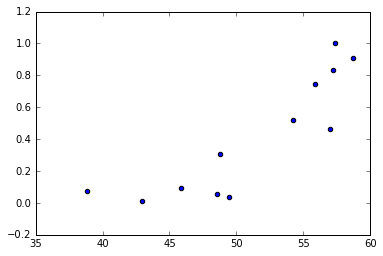

In [7]:
plt.scatter(mean_df, weather_values)
print appliance

In [33]:
def plot_corr(static):
    appliance_static_corr= {}
    appliance_static_p_val= {}
    for appliance in APPLIANCES_ORDER:
        appliance_static_corr[appliance] = {}
        appliance_static_p_val[appliance] = {}
        for month in range(1, 13):
            appliance_static_corr[appliance][month] = df[['%s_%d' %(appliance, month),static]].corr().values[0, 1]
            t = df[['%s_%d' %(appliance, month),static]].dropna()
            appliance_static_p_val[appliance][month] = pearsonr(t['%s_%d' %(appliance, month)], t[static])[1]
    fig, ax = plt.subplots(nrows=2, sharex=True)
    pd.DataFrame(appliance_static_corr).T.plot(kind='bar', legend=0, rot=0, colors='k',alpha=0.3, ax=ax[0])
    pd.DataFrame(appliance_static_p_val).T.plot(kind='bar', legend=0, rot=0, colors='k',alpha=0.3, ax=ax[1])
    plt.axhline(0.05, color='k')
    ax[0].set_title("Correlation with %s" %(static))
    ax[0].set_ylabel("Correlation")
    ax[1].set_ylabel("P-value")
    format_axes(ax[0])
    format_axes(ax[1])


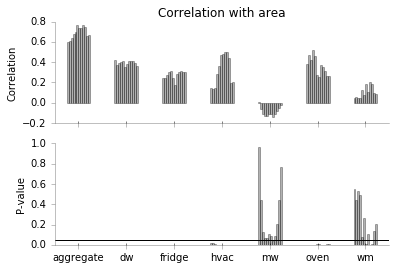

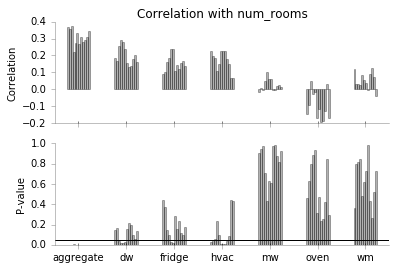

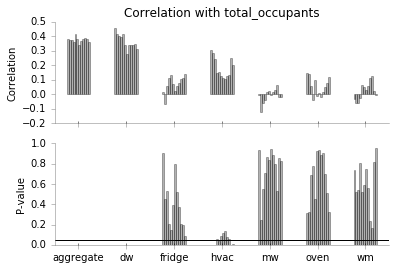

In [34]:

plot_corr('area')
plot_corr('num_rooms')
plot_corr('total_occupants')

In [40]:
appliance='mw'
a = df[['%s_%d' %(appliance, month) for month in range(1, 13)]].describe().median()
a.index = range(1, 13)
a.corr(pd.DataFrame(weather_values).squeeze())

-0.82903956753331465

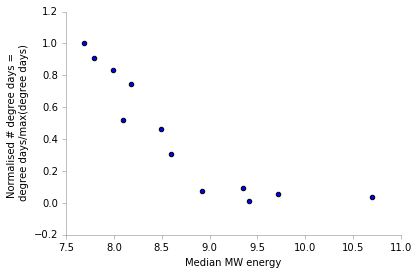

In [49]:
plt.scatter(a, weather_values)
plt.xlabel("Median MW energy")
plt.ylabel("Normalised # degree days = \n degree days/max(degree days)")
format_axes(plt.gca())

IndexError: tuple index out of range